<a href="https://colab.research.google.com/github/sushmit86/Data_science_experiments/blob/master/d2l/Chapter_4_sush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/d2l-ai/d2l-en

In [ ]:
from d2l import torch as d2l
import torch
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [ ]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256
W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))
params = [W1, b1, W2, b2]

type(params)

list

In [ ]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # Here '@' stands for matrix multiplication
    return (H@W2 + b2)
loss = nn.CrossEntropyLoss()

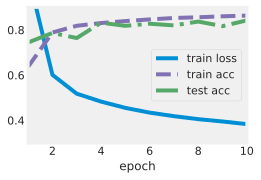

In [ ]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

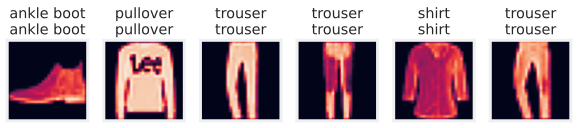

In [ ]:
d2l.predict_ch3(net, test_iter)

In [ ]:
from d2l import torch as d2l
import torch
from torch import nn
import numpy as np

Train Accuracy 0.8677166666666667
Test Accuracy  0.8513


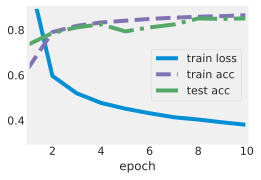

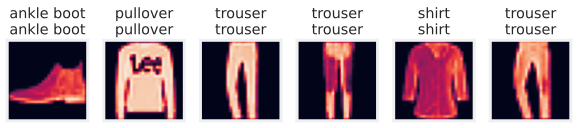

In [ ]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)


batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

print('Train Accuracy',d2l.evaluate_accuracy(net,train_iter))
print('Test Accuracy ',d2l.evaluate_accuracy(net,test_iter))


d2l.predict_ch3(net, test_iter) 

Train Accuracy 0.87805
Test Accuracy  0.8467


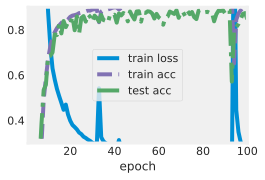

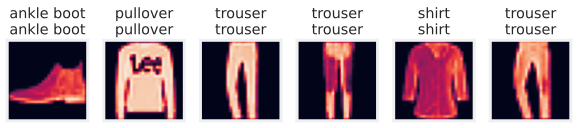

In [ ]:
net2 = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 64),
                    nn.ReLU(),
                    nn.Linear(64, 32),
                    nn.ReLU(),
                    nn.Linear(32, 10)
                    )

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, std=0.01)

net2.apply(init_weights)


batch_size, lr, num_epochs = 256, 0.1, 100
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net2.parameters(), lr=lr)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net2, train_iter, test_iter, loss, num_epochs, trainer)

print('Train Accuracy',d2l.evaluate_accuracy(net2,train_iter))
print('Test Accuracy ',d2l.evaluate_accuracy(net2,test_iter))


d2l.predict_ch3(net2, test_iter) 

In [ ]:
from d2l import torch as d2l
import torch
from torch import nn
import numpy as np
import math
from torch.utils import data
from torchvision import transforms

In [ ]:
max_degree = 20  # Maximum degree of the polynomial
n_train, n_test = 100, 100  # Training and test dataset sizes
true_w = np.zeros(max_degree)  # Allocate lots of empty space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # `gamma(n)` = (n-1)!
# Shape of `labels`: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [ ]:
# Convert from NumPy ndarrays to tensors
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[0.7074],
         [1.0822]]),
 tensor([[1.0000e+00, 7.0743e-01, 2.5023e-01, 5.9006e-02, 1.0436e-02, 1.4765e-03,
          1.7409e-04, 1.7594e-05, 1.5558e-06, 1.2229e-07, 8.6511e-09, 5.5637e-10,
          3.2799e-11, 1.7849e-12, 9.0191e-14, 4.2536e-15, 1.8807e-16, 7.8262e-18,
          3.0758e-19, 1.1452e-20],
         [1.0000e+00, 1.0822e+00, 5.8556e-01, 2.1123e-01, 5.7147e-02, 1.2369e-02,
          2.2309e-03, 3.4489e-04, 4.6655e-05, 5.6099e-06, 6.0709e-07, 5.9726e-08,
          5.3863e-09, 4.4838e-10, 3.4659e-11, 2.5005e-12, 1.6913e-13, 1.0766e-14,
          6.4728e-16, 3.6867e-17]]),
 tensor([5.3068, 5.3052]))

In [ ]:
def evaluate_loss(net, data_iter, loss):  #@save
    """Evaluate the loss of a model on the given dataset."""
    metric = d2l.Accumulator(2)  # Sum of losses, no. of examples
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(d2l.reduce_sum(l), d2l.size(l))
    return metric[0] / metric[1]

In [ ]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

weight: [[ 4.9902353  1.2391226 -3.3994765  5.4600883]]


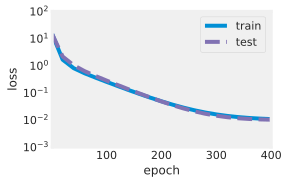

In [ ]:
# Pick the first four dimensions, i.e., 1, x, x^2/2!, x^3/3! from the
# polynomial features
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

weight: [[3.3438766 4.7234397]]


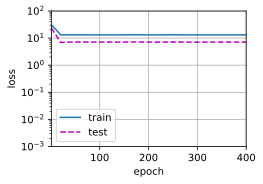

In [ ]:
# Pick the first two dimensions, i.e., 1, x, from the polynomial features
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

weight: [[ 4.9785805   1.2713314  -3.3018856   5.264483   -0.34829667  0.44061425
   0.06044049 -0.31279543 -0.14870456 -0.2325735   0.19096614  0.21157674
   0.01430355 -0.05780433 -0.01127242  0.09168547 -0.05965965 -0.04954809
   0.1855775   0.19902852]]


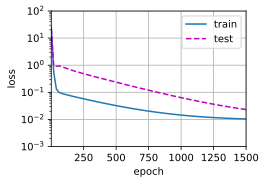

In [ ]:
# Pick all the dimensions from the polynomial features
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

In [ ]:
### generate data set
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [ ]:
class ch4_weight_decay():
  '''
  Implementation of weight decay from scratch
  lambd: lambda parameter for the model
  train_iter: Torch dataloader class (iterable)
  ep
  '''
  def __init__(self,lambd,train_iter,epoch=100,lr = 0.003):
    self.lambd = lambd
    self.epoch = epoch
    self.lr = lr
    for _iter in train_iter:
      self.w = torch.randn(_iter[0].shape[1],requires_grad = True)
      self.b = torch.tensor([0.0],requires_grad=True)
      break
    self.net = lambda X: d2l.linreg(X, self.w, self.b)
    self.loss_fn = d2l.squared_loss
    self.optim = d2l.sgd
  def model_fit(self,train_iter,show_loss = True):
    '''
    function to fit the model
    trin_iter: Torch iterator 
    show_loss = if we want to visualize the graphs
    '''
    #animator = d2l.Animator(xlabel='epochs', ylabel='loss', legend=['Train','Test'], yscale='log')
    for _epoch in range(self.epoch):
      for _iter in train_iter:
        X = _iter[0]
        y = _iter[1]
        y_hat = self.net(_iter[0])
        loss = self.loss_fn(y_hat,y) + 0.5*self.lambd* torch.dot(self.w,self.w)
        loss.sum().backward()
        d2l.sgd([self.w,self.b],self.lr, batch_size = y.shape[0])
      if show_loss:
        if _epoch == 0:
          animator = d2l.Animator(xlabel='epochs', ylabel='loss', legend=['Train','Test'], yscale='log',xlim = [5,self.epoch],figsize= (8,6))
        if (_epoch + 1)%5 == 0:
          animator.add(_epoch+1,(d2l.evaluate_loss(self.net,train_iter,self.loss_fn),d2l.evaluate_loss(self.net,test_iter,self.loss_fn)))
    l2_norm = torch.norm(self.w)
    print(f'L2 norm of w is : {l2_norm}')

L2 norm of w is : 12.525580406188965


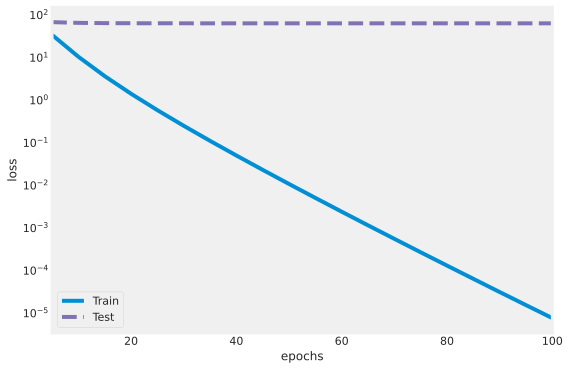

In [ ]:
ch4_1 = ch4_weight_decay(lambd= 0, train_iter=train_iter)
ch4_1.model_fit(train_iter)

L2 norm of w is : 0.362906277179718


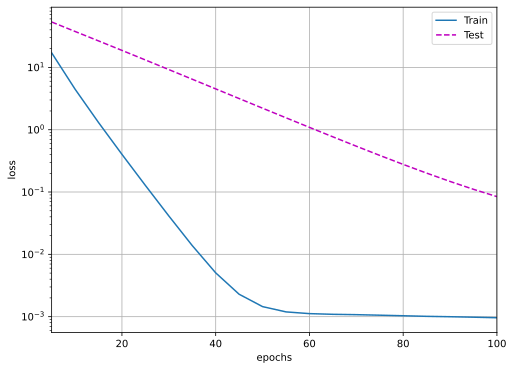

In [ ]:
ch4_1 = ch4_weight_decay(lambd= 3, train_iter=train_iter)
ch4_1.model_fit(train_iter)

In [ ]:
class ch4_weight_decay_concise():
  '''
  Implementation of weight decay
  lambd: lambda parameter for the model
  train_iter : Torch dataloader class
  epoch: Number of epcohs
  lr: Regularization parameter
  '''
  def __init__(self,lambd,train_iter,epoch =100, lr = 0.003):
    self.lambd = lambd
    self.epoch = epoch
    self.lr = lr
    for _iter in train_iter:
      self.input_size = _iter[0].shape[1]
    self.net = nn.Sequential(nn.Linear(self.input_size,1))
    for param in self.net.parameters():
      param.data.normal_()
    self.loss_fn = nn.MSELoss()
    self.optim = torch.optim.SGD([{"params": self.net[0].weight,'weight_decay': self.lambd},{"params": self.net[0].bias}], lr=lr)
  def model_fit(self,train_iter,show_loss = True):
      '''
      function to fit the model
      trin_iter: Torch iterator 
      show_loss = if we want to visualize the graphs
      '''
          #animator = d2l.Animator(xlabel='epochs', ylabel='loss', legend=['Train','Test'], yscale='log')
      for _epoch in range(self.epoch):
        for _iter in train_iter:
          X = _iter[0]
          y = _iter[1]
          y_hat = self.net(_iter[0])
          with torch.enable_grad():
            self.optim.zero_grad()
            l = self.loss_fn(self.net(X), y)
          l.backward()
          self.optim.step()
        if show_loss:
          if _epoch == 0:
            animator = d2l.Animator(xlabel='epochs', ylabel='loss', legend=['Train','Test'], yscale='log',xlim = [5,self.epoch],figsize= (8,6))
          if (_epoch + 1)%5 == 0:
            animator.add(_epoch+1,(d2l.evaluate_loss(self.net,train_iter,self.loss_fn),d2l.evaluate_loss(self.net,test_iter,self.loss_fn)))
      print(f'L2 norm of w is : {self.net[0].weight.norm().item()}')


L2 norm of w is : 12.779603958129883


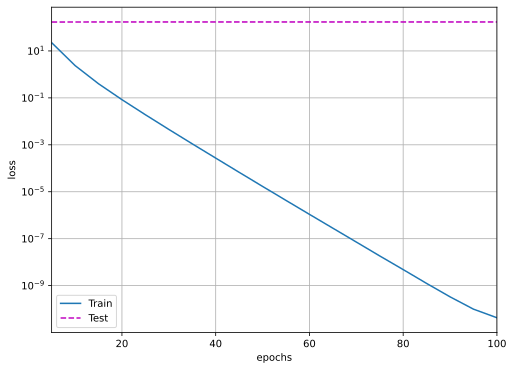

In [ ]:
ch4_1 = ch4_weight_decay_concise(lambd= 0, train_iter=train_iter)
ch4_1.model_fit(train_iter)

L2 norm of w is : 0.3906395435333252


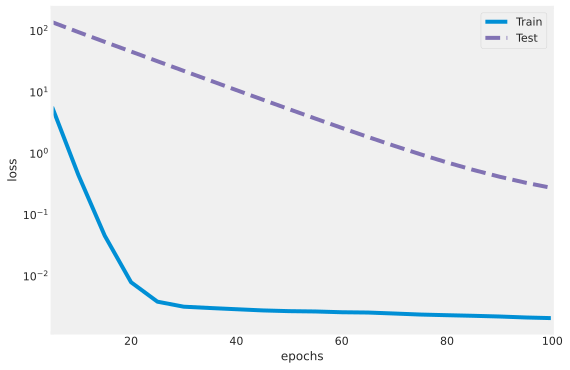

In [ ]:
ch4_1 = ch4_weight_decay_concise(lambd= 3, train_iter=train_iter)
ch4_1.model_fit(train_iter)

### 4.6 Dropout

In [ ]:
from d2l import torch as d2l
import torch
from matplotlib import pyplot as plt
# plt.style.use('Solarize_Light2')
# %matplotlib inline

In [ ]:
# test1 = torch.arange(0,16)
# test2 = torch.reshape(test1, (2,8))
# print(test2)
# def dropout_fn(X,p):
#   '''
#   X: Input tensor for dropout
#   p: probability of dropout
#   '''
#   return ((torch.rand(X.shape) > p) * X) /(1 - p) if p < 1.0 else ((torch.rand(X.shape) > p) * X)
# test3 = torch.rand(test2.shape) > 0
# #print(test3)
# #print(test2)
# dropout_fn(test2,0.8)
# X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
# print(X)
# print(dropout_fn(X, 0.))
# print(dropout_fn(X, 0.5))
# print(dropout_fn(X, 1.))
# class dropout_model_manual():
#   '''
#   batch_size: batch size of the data iteration
#   num_input
#   num_hidden_layer1
#   num_hidden_layer2
#   num_output
#   dropout_prob
#   '''
#   def __init__(self,batch_size,num_input,num_hidden_layer1, num_hidden_layer2, num_output,dropout_prob, epoch =100, lr = 0.003):
#     self.batch_size = batch_size
#     self.train_iter, self.test_iter = d2l.load_data_fashion_mnist(self.batch_size)
#     self.num_input = num_input
#     self.num_hidden_layer1 = num_hidden_layer1
#     self.num_hidden_layer2 = num_hidden_layer2
#     self.num_output = num_output
#     self.dropout_prob = dropout_prob
  
#   def model_fit()

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15]])


In [ ]:
dropout1, dropout2 = 0.2, 0.5
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # In this case, all elements are dropped out
    if dropout == 1:
        return torch.zeros_like(X)
    # In this case, all elements are kept
    if dropout == 0:
        return X
    mask = (torch.Tensor(X.shape).uniform_(0, 1) > dropout).float()
    return mask * X / (1.0 - dropout)

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()

        self.num_inputs = num_inputs
        self.training = is_training

        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)

        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # Use dropout only when training the model
        if self.training == True:
            # Add a dropout layer after the first fully connected layer
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # Add a dropout layer after the second fully connected layer
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

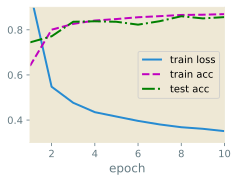

In [ ]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # Add a dropout layer after the first fully connected layer
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # Add a dropout layer after the second fully connected layer
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

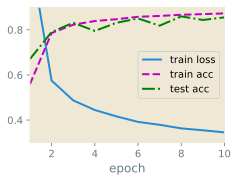

In [ ]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
batch_size =  256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [ ]:
class dropout_model(nn.Module):
  '''
  num_inputs: Number of inputs
  num_layer1: Number of hidden units for layer1
  num_layer2: Number of hidden units for layer2
  num_ouputs: Number of outputs
  dropout1: Dropout for layer 1
  dropout2: Dropout for layer 2
  epochs: Number of epochs
  lr: Learning rate
  '''
  
  def __init__(self,num_inputs,num_layer1,num_layer2,num_ouputs,dropout1 = 0.2,dropout2 = 0.5,epochs = 10, lr = 0.5):
    super(dropout_model, self).__init__()
    self.num_inputs = num_inputs
    self.num_layer1 = num_layer1
    self.num_layer2 = num_layer2
    self.num_ouputs = num_ouputs
    self.dropout1 = dropout1
    self.dropout2 = dropout2
    self.lr = lr
    self.epochs = epochs
    self.model = nn.Sequential(nn.Flatten(),
                              nn.Linear(self.num_inputs,self.num_layer1),
                              nn.ReLU(),
                              nn.Dropout(self.dropout1),
                              nn.Linear(self.num_layer1,self.num_layer2),
                              nn.ReLU(),
                              nn.Dropout(self.dropout2 ),
                              nn.Linear(self.num_layer2,self.num_ouputs))
    self.model_loss = nn.CrossEntropyLoss
    self.trainer = torch.optim.SGD

  def model_fit(self,train_iter, test_iter):
    '''
    train_iter: train iteration
    test_iter: test iteration
    '''
    if type(self.model) == nn.Linear:
      torch.nn.init.normal_(self.model.weight, std=0.01)
    trainer = self.trainer(self.model.parameters(), lr = self.lr)
    loss = self.model_loss()
    d2l.train_ch3(self.model, train_iter, test_iter, loss, self.epochs, trainer)

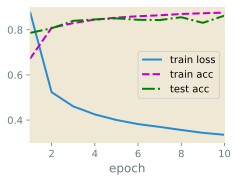

In [ ]:
dropout_test1 = dropout_model(784,256,256,10)
dropout_test1.model_fit(train_iter,test_iter)

### 4.8 Numerical Stability

In [ ]:
from d2l import torch as d2l
import torch
from matplotlib import pyplot as plt
plt.style.use('Solarize_Light2')
%matplotlib inline

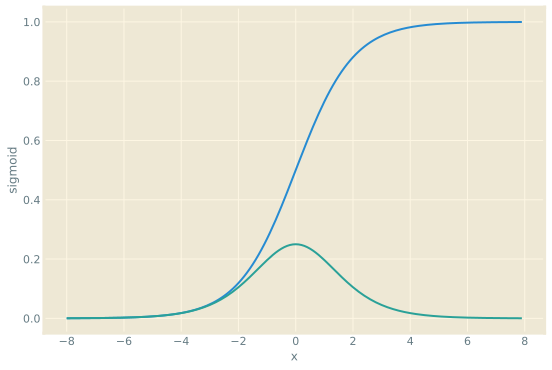

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))
fig, axs = plt.subplots(1,1, figsize = (8,6))
axs.plot(x.detach().numpy(), y.detach().numpy())
axs.plot(x.detach().numpy(),x.grad.data.numpy())
axs.set_xlabel('x')
axs.set_ylabel('sigmoid')
fig.show()


In [ ]:
M = torch.normal(0, 1, size=(4,4))
print('a single matrix \n',M)
for i in range(100):
    M = torch.mm(M,torch.normal(0, 1, size=(4, 4)))

print('after multiplying 100 matrices\n', M)

a single matrix 
 tensor([[-0.5513,  0.5837,  0.1609, -3.0771],
        [ 1.1294, -0.6131, -1.4726, -0.4946],
        [ 0.4827, -1.0457, -0.0111,  1.8005],
        [ 0.4329, -0.6458,  1.6115,  0.7164]])
after multiplying 100 matrices
 tensor([[ 6.8806e+24, -1.9191e+24, -3.0453e+24, -7.1837e+24],
        [ 3.0670e+24, -8.5543e+23, -1.3574e+24, -3.2021e+24],
        [-1.7558e+24,  4.8973e+23,  7.7711e+23,  1.8332e+24],
        [ 2.0170e+23, -5.6257e+22, -8.9270e+22, -2.1059e+23]])


# 4.10  Predicting House Prices on Kaggle

In [ ]:
import os
import requests
import zipfile
import tarfile
import hashlib
from google.colab import  drive
drive.mount("/drive", force_remount=True)
#@save
DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'

Mounted at /drive


In [ ]:
def download(name, cache_dir=os.path.join('..', 'data')):  #@save
    """Download a file inserted into DATA_HUB, return the local filename."""
    assert name in DATA_HUB, f"{name} does not exist in {DATA_HUB}."
    url, sha1_hash = DATA_HUB[name]
    os.makedirs(cache_dir, exist_ok=True)
    fname = os.path.join(cache_dir, url.split('/')[-1])
    if os.path.exists(fname):
        sha1 = hashlib.sha1()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)
                if not data:
                    break
                sha1.update(data)
        if sha1.hexdigest() == sha1_hash:
            return fname  # Hit cache
    print(f'Downloading {fname} from {url}...')
    r = requests.get(url, stream=True, verify=True)
    with open(fname, 'wb') as f:
        f.write(r.content)
    return fname

In [ ]:
def download_extract(name, folder=None):  #@save
    """Download and extract a zip/tar file."""
    fname = download(name)
    base_dir = os.path.dirname(fname)
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, 'Only zip/tar files can be extracted.'
    fp.extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir

def download_all():  #@save
    """Download all files in the DATA_HUB."""
    for name in DATA_HUB:
        download(name)

In [ ]:
from d2l import torch as d2l
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('Solarize_Light2')
%matplotlib inline

In [ ]:
DATA_HUB['kaggle_house_train'] = (  #@save
    DATA_URL + 'kaggle_house_pred_train.csv',
    '585e9cc93e70b39160e7921475f9bcd7d31219ce')

DATA_HUB['kaggle_house_test'] = (  #@save
    DATA_URL + 'kaggle_house_pred_test.csv',
    'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')

In [ ]:
train_data = pd.read_csv(download('kaggle_house_train'))
test_data = pd.read_csv(download('kaggle_house_test'))

In [ ]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [ ]:
display(train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]])
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

,Id,MSSubClass,MSZoning,LotFrontage,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,WD,Normal,208500
1,2,20,RL,80.0,WD,Normal,181500
2,3,60,RL,68.0,WD,Normal,223500
3,4,70,RL,60.0,WD,Abnorml,140000


In [ ]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# After standardizing the data all means vanish, hence we can set missing
# values to 0
all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [ ]:
# `Dummy_na=True` considers "na" (missing value) as a valid feature value, and
# creates an indicator feature for it
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(2919, 331)

In [ ]:
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)
train_labels = torch.tensor(
    train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)

In [ ]:
loss = nn.MSELoss()
in_features = train_features.shape[1]

# def get_net():
#     net = nn.Sequential(nn.Linear(in_features,1))
#     return net
dropout1, dropout2 = 0.2, 0.5

def get_net():
    net = nn.Sequential( nn.Linear(in_features, 64),nn.ReLU(),nn.Dropout(0.05),nn.Linear(64, 1))
    return net

In [ ]:
def log_rmse(net, features, labels):
    # To further stabilize the value when the logarithm is taken, set the
    # value less than 1 as 1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()

In [ ]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    # The Adam optimization algorithm is used here
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [ ]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

In [ ]:
for i in range(2):
    data = get_k_fold_data(k, i, train_features, train_labels)
    break
print(type(data))

<class 'tuple'>


In [ ]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'fold {i + 1}, train log rmse {float(train_ls[-1]):f}, '
              f'valid log rmse {float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k

fold 1, train log rmse 0.115131, valid log rmse 0.137729
fold 2, train log rmse 0.113451, valid log rmse 0.149121
fold 3, train log rmse 0.102688, valid log rmse 0.143602
fold 4, train log rmse 0.117505, valid log rmse 0.122989
fold 5, train log rmse 0.102375, valid log rmse 0.156687
5-fold validation: avg train log rmse: 0.110230, avg valid log rmse: 0.142026


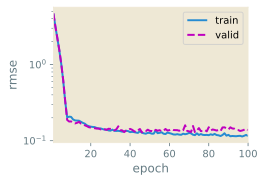

In [ ]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 0.1, 5, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-fold validation: avg train log rmse: {float(train_l):f}, '
      f'avg valid log rmse: {float(valid_l):f}')

In [ ]:
# hyper_param_train = []
# hyper_param_validation = []
# for lr in np.linspace(15,20,10):
#   k, num_epochs, lr, weight_decay, batch_size = 5, 100, lr, 0, 64
#   train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
#                           weight_decay, batch_size)
#   print(f'{k}-fold validation: avg train log rmse: {float(train_l):f}, '
#         f'avg validation log rmse: {float(valid_l):f}',f'learning rate: {float(lr):f}')
#   hyper_param_train.append(train_l)
#   hyper_param_validation.append(valid_l)



In [ ]:
# hyper_param_train = []
# hyper_param_validation = []
# list_weight_decay = [0,0.0001,0.001,]
# for weight_decay in list_weight_decay:
#   k, num_epochs, lr, weight_decay, batch_size = 5, 100, 15, weight_decay, 64
#   train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
#                           weight_decay, batch_size)
#   print(f'{k}-fold validation: avg train log rmse: {float(train_l):f}, '
#         f'avg validation log rmse: {float(valid_l):f}',f'weight_decay: {float(weight_decay):f}')
#   hyper_param_train.append(train_l)
#   hyper_param_validation.append(valid_l)


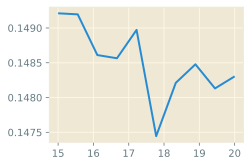

In [ ]:
fig,axs = plt.subplots(1,1)
#axs.plot(hyper_param_train,np.linspace(0,10,10))
axs.plot(np.linspace(15,20,10),hyper_param_validation)

In [ ]:
a = np.array([1,2,3])
b = np.array([4,5])
c = np.meshgrid(a,b)
c[0]
np.arange(15,20,0.3)

array([15. , 15.3, 15.6, 15.9, 16.2, 16.5, 16.8, 17.1, 17.4, 17.7, 18. ,
       18.3, 18.6, 18.9, 19.2, 19.5, 19.8])

In [ ]:
def train_and_pred(train_features, test_feature, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'train log rmse {float(train_ls[-1]):f}')
    # Apply the network to the test set
    preds = d2l.numpy(net(test_features))
    # Reformat it to export to Kaggle
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('/drive/My Drive/Colab_Notebooks/Dive_into_deep_learning/submission.csv',index=False)
    #submission.to_csv('submission.csv', index=False)

train log rmse 0.213481


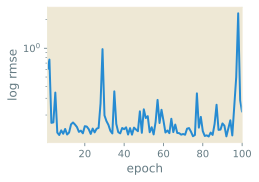

In [ ]:
lr = 17.7
weight_decay = 0.0001
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)

In [ ]:
slice(1 * 3, 2 * 3)

slice(3, 6, None)